# author: Kevin Rohe
### version: 08/03/22
### Linearized stability of ode in 2D
### made for thesis introduction

In [6]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 20
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
})

x = np.linspace(-1.0,1.0,16)
xv,yv = np.meshgrid(x,x)
NI, NJ = xv.shape

In [4]:
def lambdas(j): #returns the Eigenvalues of J, as well as T and D
    T = np.trace(j)
    D = np.linalg.det(j)
    return (T+np.sqrt(T**2-4*D+0.j))/2, (T-np.sqrt(T**2-4*D+0.j))/2#, T, D

def streamers(jac,xv,yv): #returns matrices for the streamplots
    u, v = np.zeros_like(xv), np.zeros_like(yv)
    for i in range(NI):
        for j in range(NJ):
            x, y = xv[i, j], yv[i, j]
            u[i,j] = np.dot([x,y],jac)[0]
            v[i,j] = np.dot([x,y],jac)[1]
    return u,v

def revjac(tr,det,ini): #returns possible jacobian given Trace and determinant
    return np.array([[ini[0], ini[1]],[(ini[0]*(tr - ini[0])-det)/ini[1],tr-ini[0]]])

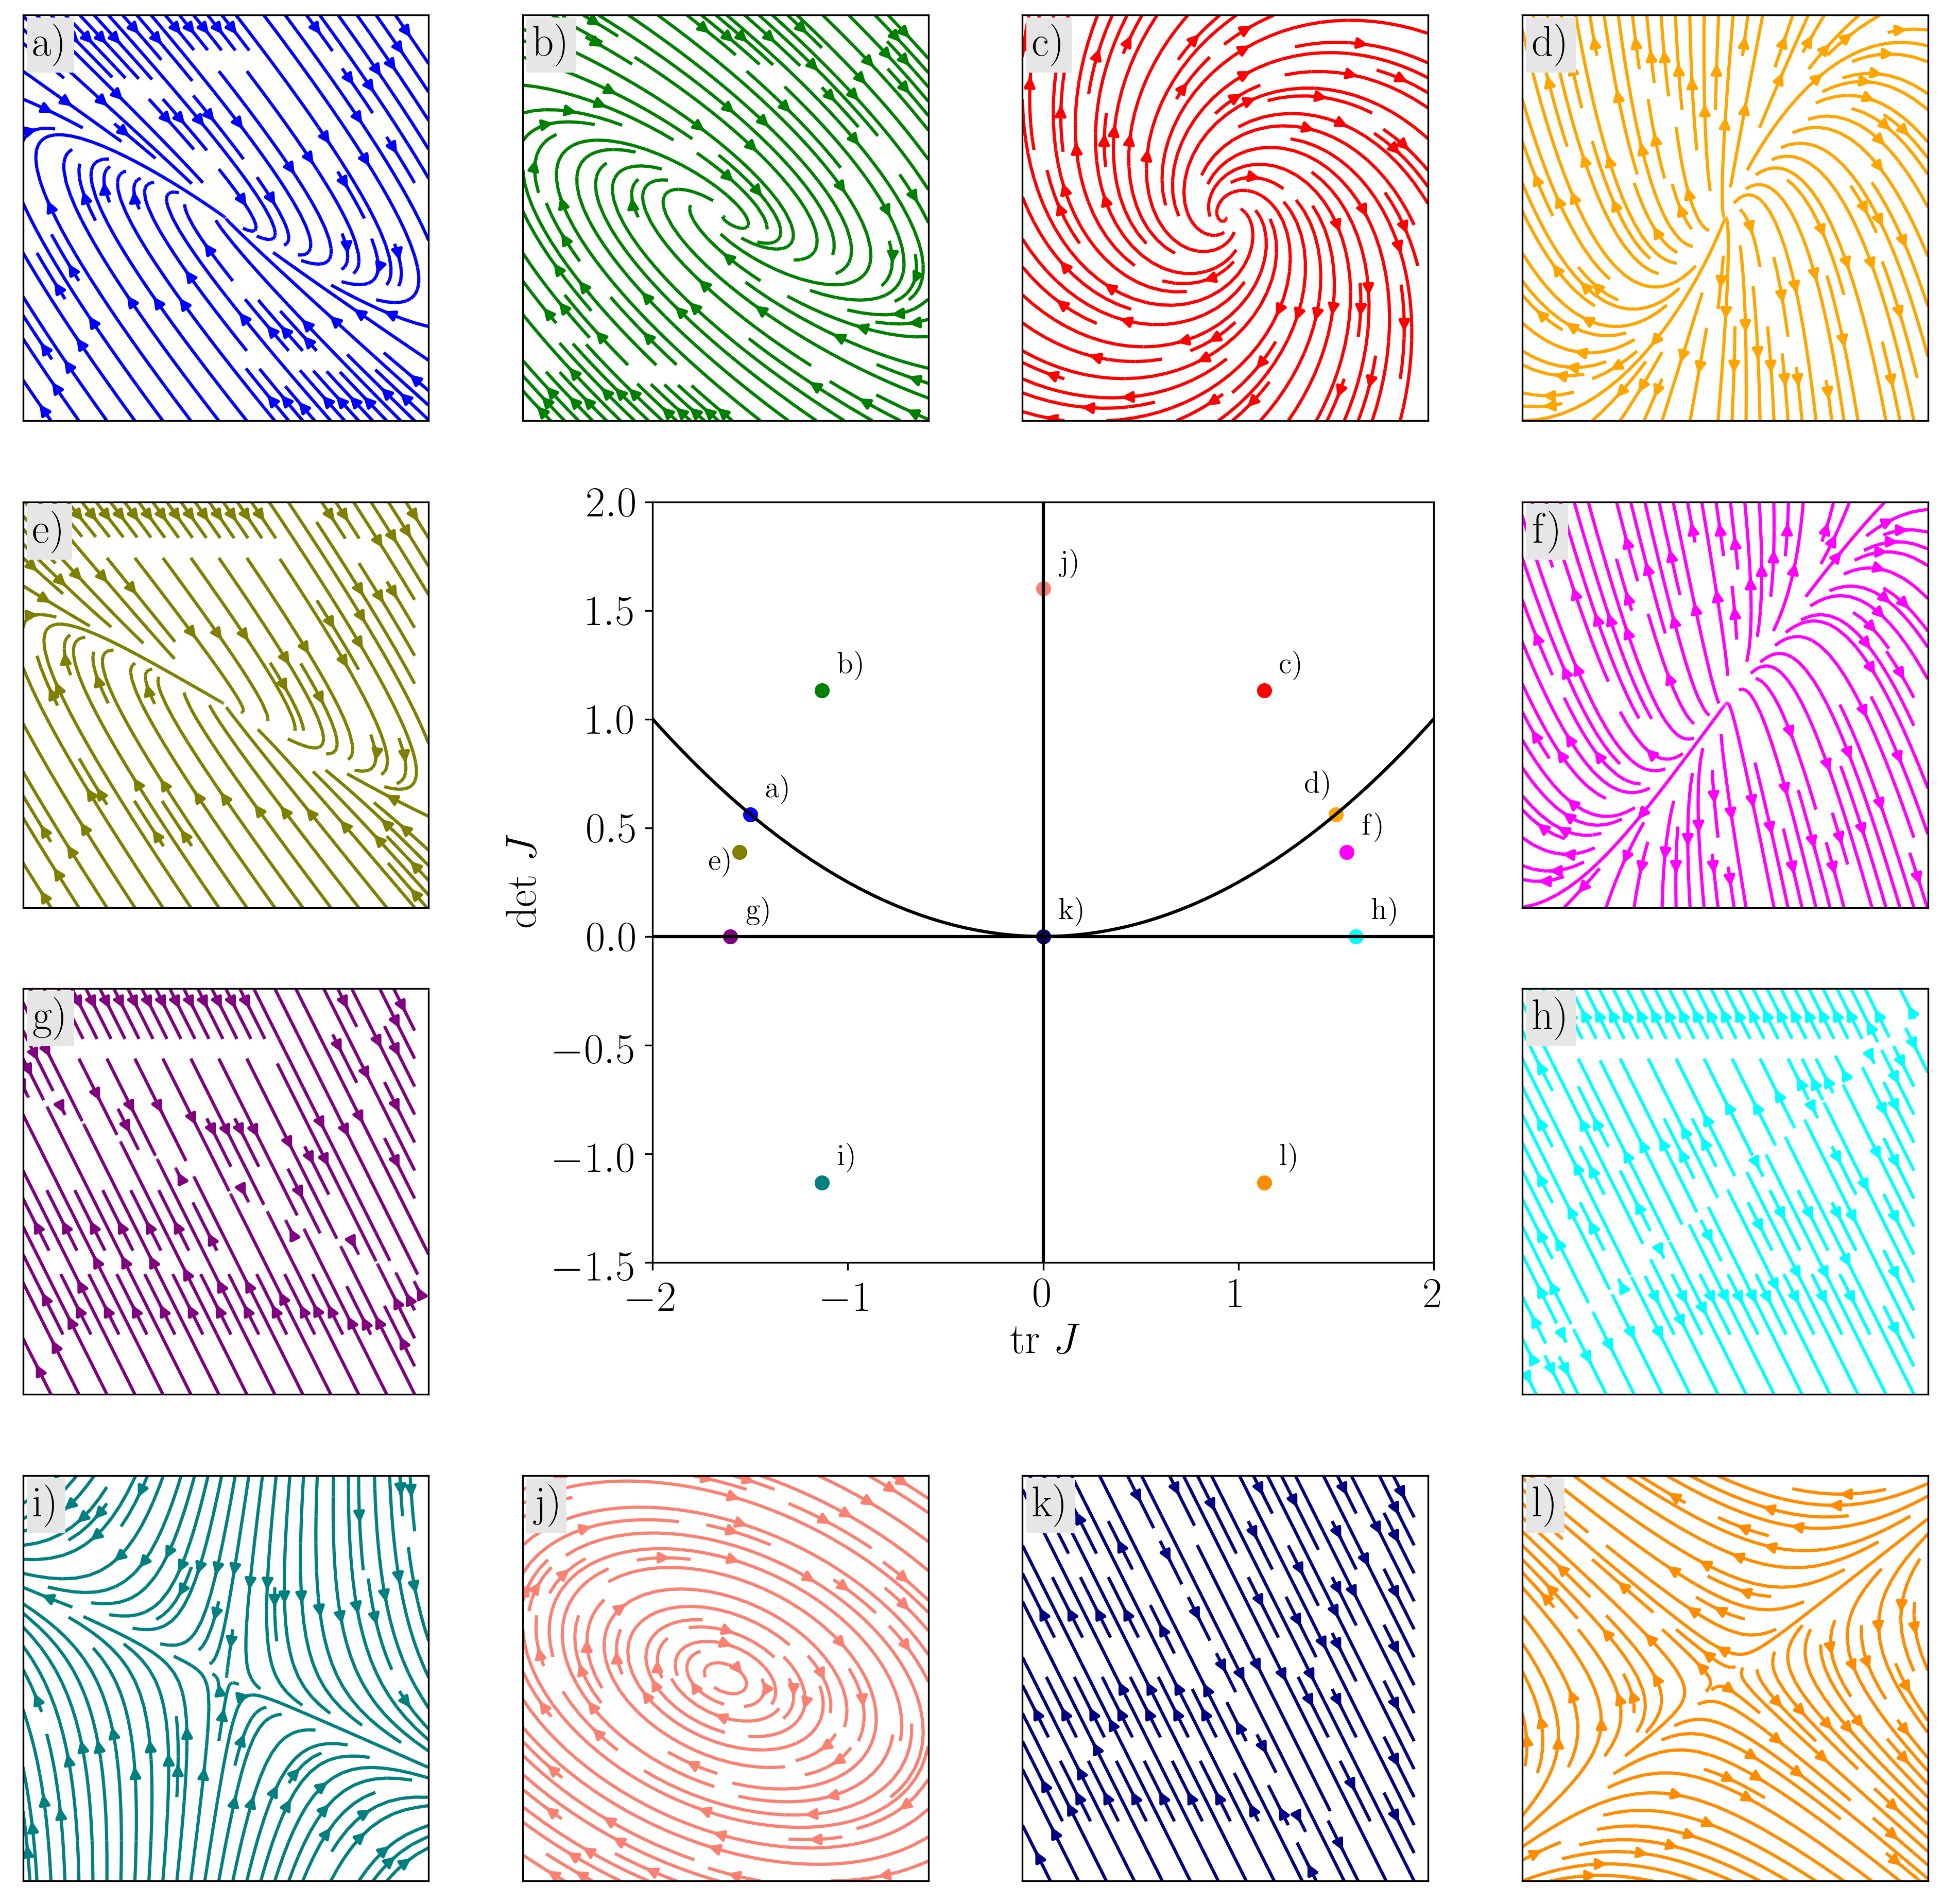

In [26]:
#Layout
fig = plt.figure(constrained_layout=False,figsize=(16,16),dpi=300)
gs0 = fig.add_gridspec(4, 4,wspace=0.2, hspace=0.2)
temp = 1.5
gs01 = gs0[1:3, 1:3].subgridspec(2, 2,width_ratios=[0.1, temp],height_ratios=[temp, 0.1])
ax1 = fig.add_subplot(gs01[0,1])
ax2 = fig.add_subplot(gs0[0, 0])
ax3 = fig.add_subplot(gs0[0, 1])
ax4 = fig.add_subplot(gs0[0, 2])
ax5 = fig.add_subplot(gs0[0, 3])
ax6 = fig.add_subplot(gs0[1, 0])
ax7 = fig.add_subplot(gs0[1, 3])
ax8 = fig.add_subplot(gs0[2, 0])
ax9 = fig.add_subplot(gs0[2, 3])
ax10 = fig.add_subplot(gs0[3, 0])
ax11 = fig.add_subplot(gs0[3, 1])
ax12 = fig.add_subplot(gs0[3, 2])
ax13 = fig.add_subplot(gs0[3, 3])
#Mainplot+Beautify
axs = [ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13]
for tax in axs:
        tax.axis('square')
        tax.axis([-1, 1, -1, 1])
        tax.set_xticks([])
        tax.set_yticks([])
ax1.plot(np.linspace(-3.0,3.0,100),(np.linspace(-3.0,3.0,100))**2/4,'k')
ax1.plot([-3,3],[0,0],'k')
ax1.plot([0,0],[-3,3],'k')
ax1.set_xlabel("tr $J$")
ax1.set_ylabel("det $J$")
ax1.axis([-2, 2, -1.5, 2])

#defining dicts for settings
colordict = {0:"blue", 1:"green", 2:"red", 3:"orange", 4:"olive", 5:"magenta",
             6:"purple", 7:"cyan", 8:"teal", 9:"salmon", 10:"navy", 11:"darkorange"}
labeldict = {0:"a)", 1:"b)", 2:"c)", 3:"d)",4:"e)",5:"f)",
             6:"g)", 7:"h)", 8:"i)", 9:"j)",10:"k)",11:"l)"}
offsetdict = {0:[0.08]*2, 1:[0.08]*2, 2:[0.08]*2, 3:[-0.16,0.1], 4:[-0.16,-0.08], 5:[0.08]*2,
              6:[0.08]*2, 7:[0.08]*2, 8:[0.08]*2, 9:[0.08]*2, 10:[0.08]*2, 11:[0.08]*2}
i = 0
#Mainplots and scatters
for point in [(-3/2,9/16),(-np.sqrt(657/512),np.sqrt(657/512)),(np.sqrt(657/512),np.sqrt(657/512)),(3/2,9/16),
             (-np.sqrt(657/272), np.sqrt(657/4352)),(np.sqrt(657/272), np.sqrt(657/4352)),
             (-np.sqrt(657/256),0),(np.sqrt(657/256),0),
             (-np.sqrt(657/512),-np.sqrt(657/512)),(0,np.sqrt(657/256)),(0,0),(np.sqrt(657/512),-np.sqrt(657/512))]:
    jac = revjac(*point,(0.5,-1))
    axs[i].streamplot(xv, yv, *streamers(jac,xv,yv),color=colordict[i])
    axs[i].text(-0.95,0.80,labeldict[i],bbox=dict(facecolor='0.9', edgecolor='none', pad=3.0))
    ax1.scatter(*point,color=colordict[i])
    ax1.text(point[0]+offsetdict[i][0],point[1]+offsetdict[i][-1],labeldict[i],fontsize=14)
    i +=1

plt.savefig("stability-diagram.pdf", dpi=300, bbox_inches="tight")